<a href="https://colab.research.google.com/github/VeneratioVitae/Hamoye_Quiz/blob/master/Stage_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!unzip "/content/drive/My Drive/datas/household_power_consumption.zip" -d "/content/drive/My Drive/datasets/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [90]:
df = pd.read_csv('/content/drive/My Drive/datasets/household_power_consumption.txt', sep=";", header='infer', parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values = '?', dtype = float, low_memory=False)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [126]:
df.shape

(2075259, 7)

In [121]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [129]:
db = df.dropna(inplace=True)

In [124]:
da.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [94]:
da.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [128]:
da.shape

(2075259, 7)

In [127]:
df_day.shape

(1457, 7)

In [125]:
#Downsample to per day data points
df_day = db.resample('D').sum()
df_day.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


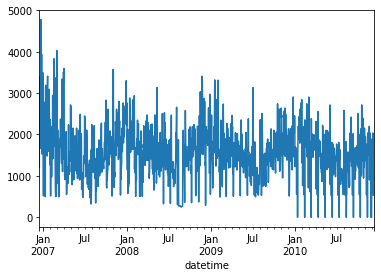

<Figure size 1224x576 with 0 Axes>

In [102]:
df_day['Global_active_power'].plot()
plt.figure(figsize=(17, 8))

plt.show()

In [103]:
df_day.corr(method='pearson')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.127081,0.265571,0.999220,0.550647,0.486537,0.749872
Global_reactive_power,0.127081,1.000000,0.349670,0.148791,0.333737,0.201664,0.119110
Voltage,0.265571,0.349670,1.000000,0.269229,0.100150,0.086008,0.263642
Global_intensity,0.999220,0.148791,0.269229,1.000000,0.562513,0.495339,0.742301
Sub_metering_1,0.550647,0.333737,0.100150,0.562513,1.000000,0.258569,0.323297
Sub_metering_2,0.486537,0.201664,0.086008,0.495339,0.258569,1.000000,0.213949
Sub_metering_3,0.749872,0.119110,0.263642,0.742301,0.323297,0.213949,1.000000


In [5]:
data = df.copy()

In [6]:
data.shape

(2075259, 7)

In [7]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [9]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [10]:
data.skew()

Global_active_power      1.786233
Global_reactive_power    1.261914
Voltage                 -0.326665
Global_intensity         1.849100
Sub_metering_1           5.944541
Sub_metering_2           7.090553
Sub_metering_3           0.724688
dtype: float64

## Visualization of the Time Series distribution

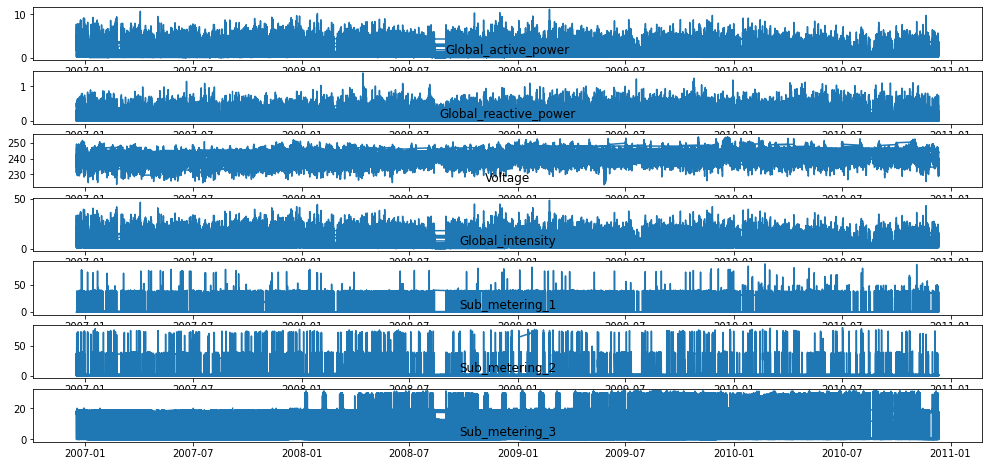

In [11]:
# line plot for each variable
plt.figure(figsize=(17, 8))
for i in range(len(data.columns)):
	plt.subplot(len(data.columns), 1, i+1)
	name = data.columns[i]
	plt.plot(data[name])
	plt.title(name, y=0)
plt.show()

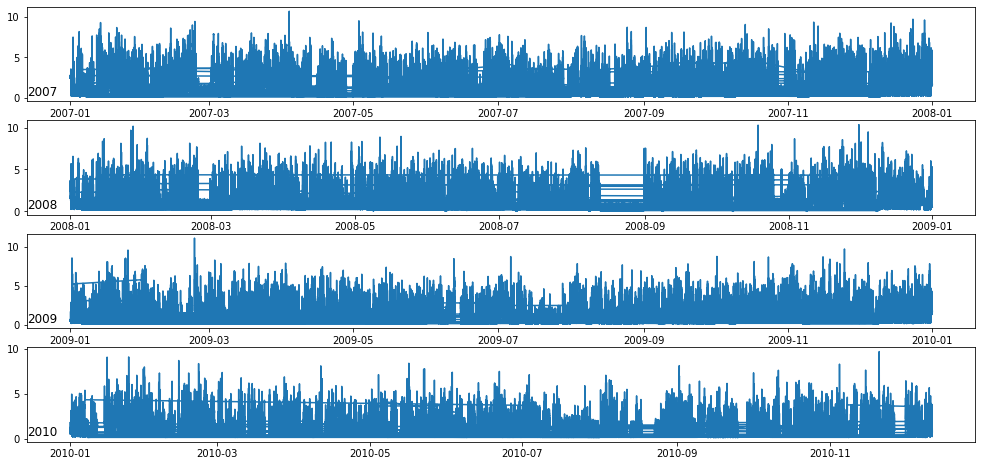

In [12]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(17, 8))
for i in range(len(years)):
# prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]

# get all observations for the year
    result = data.loc[str(year)]
# plot the active power for the year
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(str(year), y=0, loc='left')
plt.show()

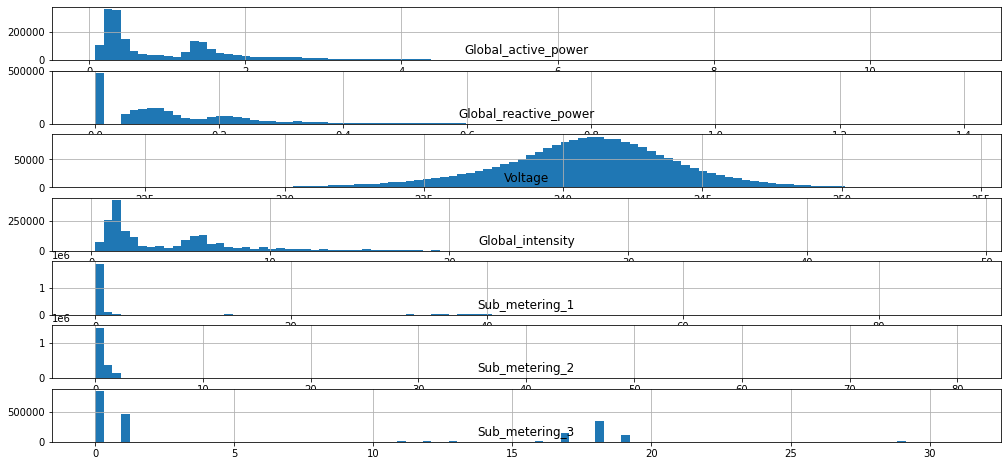

In [13]:
# histogram plot for each variable
plt.figure(figsize=(17, 8))
for i in range(len(data.columns)):
	plt.subplot(len(data.columns), 1, i+1)
	name = data.columns[i]
	data[name].hist(bins=100)
	plt.title(name, y=0)
plt.show()

Here we can observe the distribution of individual columns... For the Global Active Power for example, there is some bimodal distribution

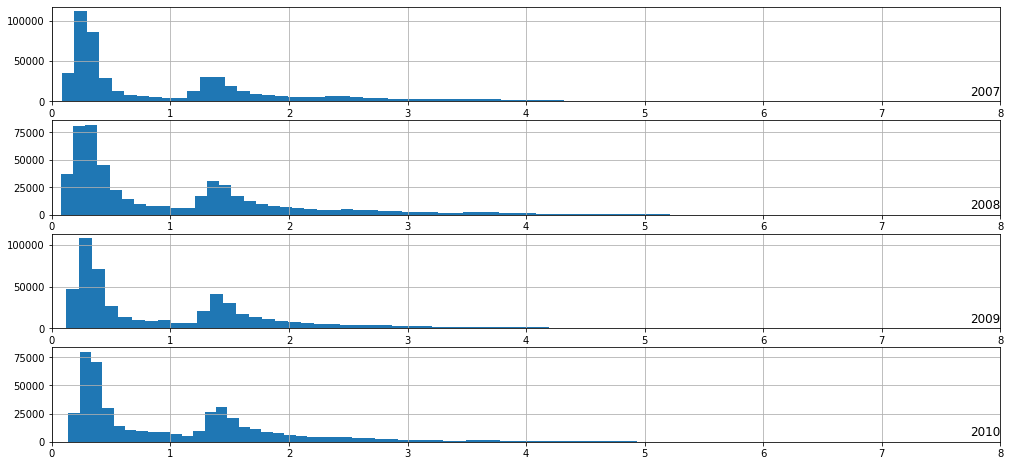

In [14]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(17, 8))
for i in range(len(years)):
	# prepare subplot
	ax = plt.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = data.loc[str(year)]
	# plot the active power for the year
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 8)
	# add a title to the subplot
	plt.title(str(year), y=0, loc='right')
plt.show()

Plotting a yearly histogram and we can see the bimodal pattern of distribution more clearly... We could also do the same for all the other columns for a more extensive analysis

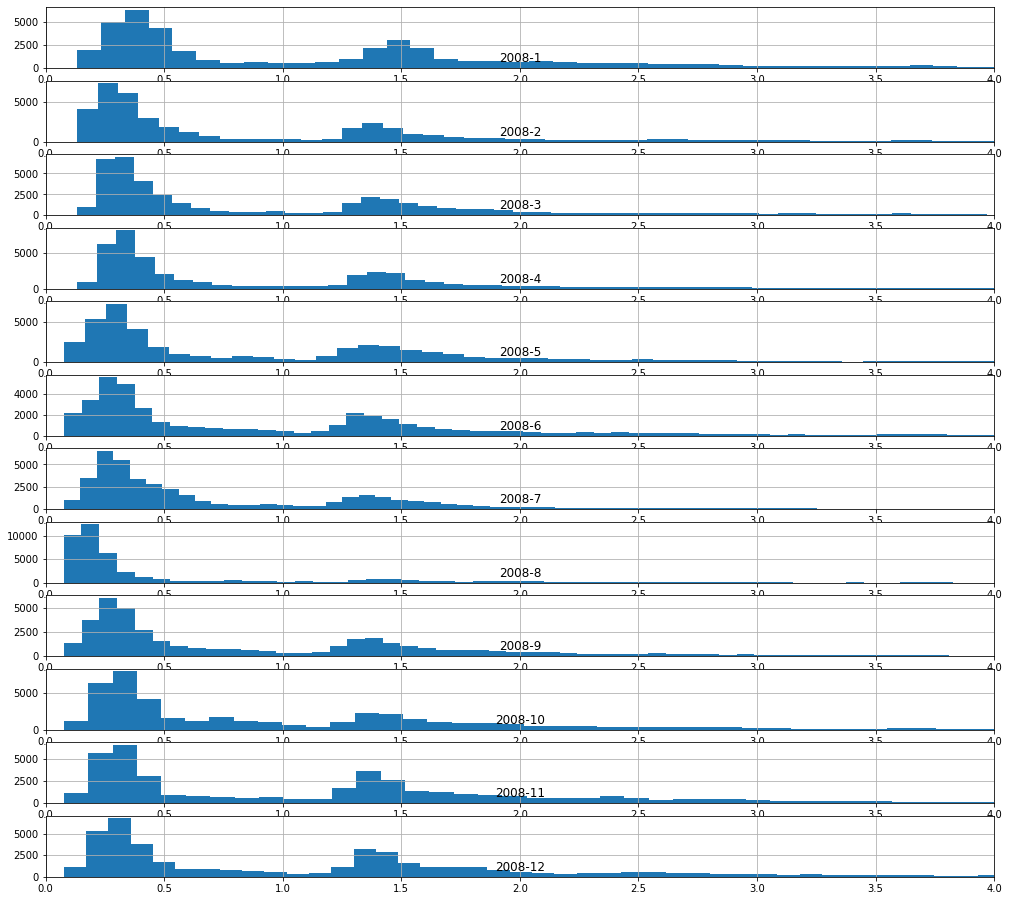

In [15]:
months = [x for x in range(1, 13)]
plt.figure(figsize=(17, 16))
for i in range(len(months)):
	# prepare subplot
	ax = plt.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2008-' + str(months[i])
	# get all observations for the month
	result = data.loc[month]
	# plot the active power for the month
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 4)
	# add a title to the subplot
	plt.title(month, y=0, loc='center')
plt.show()

Using Year 2008, we still observe that bimodal pattern roughly similar across all months

In [41]:
#Downsample to daily data points
data_daily = data.resample('D').sum()
data_daily.head(14)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
2006-12-21,1716.624,144.166,346616.31,7238.6,1765.0,2623.0,10421.0
2006-12-22,2341.338,186.906,347305.75,9897.0,3151.0,350.0,11131.0
2006-12-23,4773.386,221.470,345795.95,20200.4,2669.0,425.0,14726.0
2006-12-24,2550.012,149.900,348029.91,11002.2,1703.0,5082.0,6891.0


In [42]:
data_daily.shape

(1457, 7)

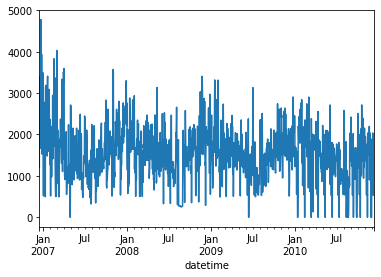

In [89]:
data_daily['Global_active_power'].plot()
plt.show()

In [138]:
y = df_day
y.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0


In [105]:
y.shape

(1457, 1)

In [139]:
train = y.iloc[0:-365]
test = y.iloc[-365:]

In [107]:
train.head(2)

,Global_active_power
datetime,
2006-12-16,1209.176
2006-12-17,3390.460


In [108]:
test.tail(2)

,Global_active_power
datetime,
2010-12-10,1579.692
2010-12-11,1836.822


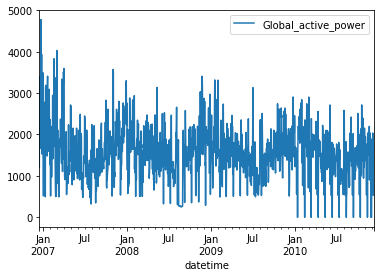

<Figure size 1224x1152 with 0 Axes>

In [109]:
y.plot()
plt.figure(figsize=(17, 16))
plt.show()

In [140]:
train = train.reset_index()
train.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [141]:
train = train.rename(columns={"datetime": "ds", "Global_active_power": "y"})

In [142]:
m = Prophet()
m.add_regressor('Global_reactive_power')
m.add_regressor('Voltage')
m.add_regressor('Global_intensity')
m.add_regressor('Sub_metering_1')
m.add_regressor('Sub_metering_2')
m.add_regressor('Sub_metering_3')
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [144]:
#predict for the next 10 days
#future = m.make_future_dataframe(periods=365, freq='D') 
forecast = m.predict(train.drop(columns='Global_active_power')) 
forecast.head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

KeyError: ignored

In [ ]:
forecast = m.predict(df_test.drop(columns="y"))

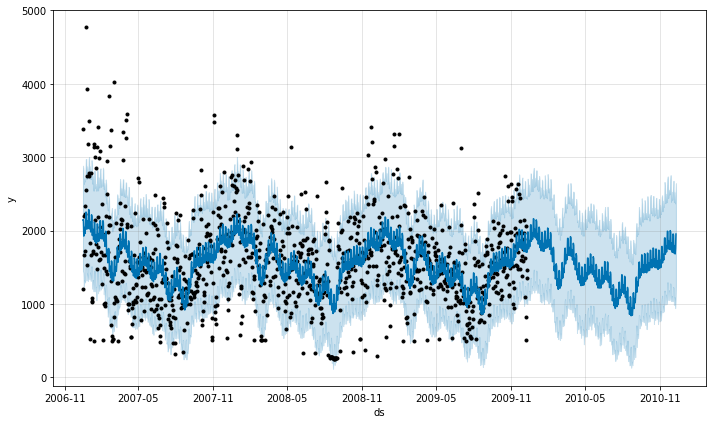

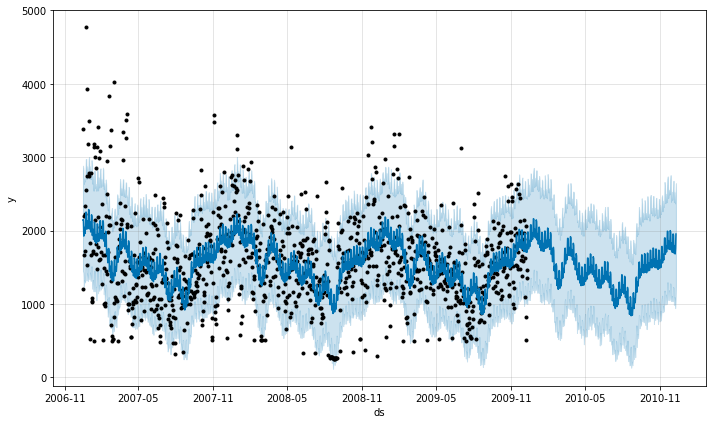

In [114]:
m.plot(forecast)

In [131]:
y = y.reset_index()
comparison_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(y.set_index('datetime'))
comparison_df.head()

,yhat,yhat_lower,yhat_upper,level_0,index,Global_active_power
ds,,,,,,
2006-12-16,2146.157364,1450.265115,2884.862413,0,0,1209.176
2006-12-17,2149.527442,1427.412429,2845.419050,1,1,3390.460
2006-12-18,1925.419405,1236.751727,2637.820302,2,2,2203.826
2006-12-19,2044.099546,1321.805436,2718.799059,3,3,1666.194
2006-12-20,2020.944217,1301.960518,2701.374904,4,4,2225.748


In [132]:
comparison_df['e'] = comparison_df['Global_active_power'] - comparison_df['yhat']
comparison_df['p'] = 100 * comparison_df['e'] / comparison_df['Global_active_power']

In [133]:
comparison_df.head()

,yhat,yhat_lower,yhat_upper,level_0,index,Global_active_power,e,p
ds,,,,,,,,
2006-12-16,2146.157364,1450.265115,2884.862413,0,0,1209.176,-936.981364,-77.489246
2006-12-17,2149.527442,1427.412429,2845.419050,1,1,3390.460,1240.932558,36.600714
2006-12-18,1925.419405,1236.751727,2637.820302,2,2,2203.826,278.406595,12.632876
2006-12-19,2044.099546,1321.805436,2718.799059,3,3,1666.194,-377.905546,-22.680765
2006-12-20,2020.944217,1301.960518,2701.374904,4,4,2225.748,204.803783,9.201571


In [134]:
predicted_part = comparison_df[-365:]

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
mse = mean_squared_error([comparison_df['Global_active_power']], [comparison_df['yhat']])
rmse = np.sqrt(mse)
print(rmse)

557.8042420619951


In [137]:
error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
print({'MAPE': error_mean('p'), 'MAE': error_mean('e')})

{'MAPE': inf, 'MAE': 404.5185227451316}


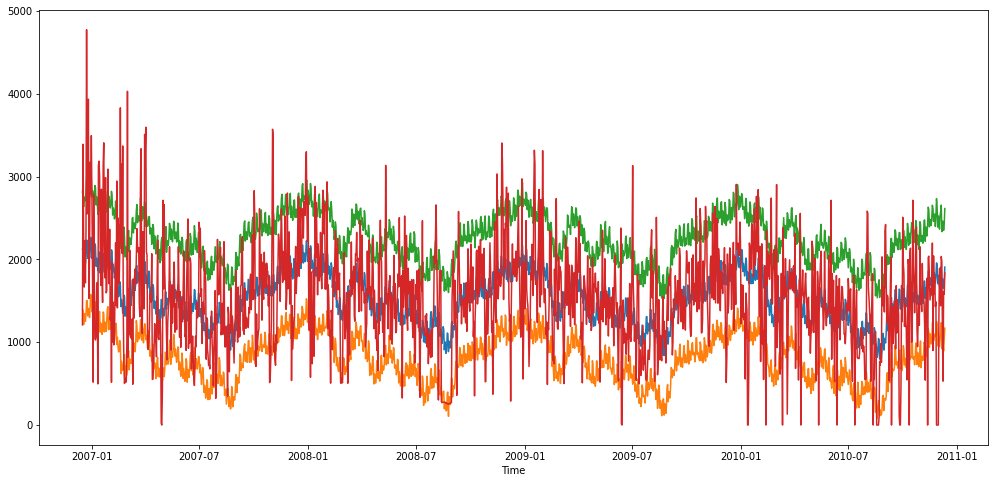

In [74]:
plt.figure(figsize=(17, 8))
plt.plot(comparison_df['yhat'])
plt.plot(comparison_df['yhat_lower'])
plt.plot(comparison_df['yhat_upper'])
plt.plot(comparison_df['Global_active_power'])
plt.xlabel('Time')
plt.grid(False)
plt.show()

In [18]:
#Downsample to per minute data points
data_minute = data.resample('T').sum()
data_minute.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [19]:
data_minute.shape

(2097036, 7)

In [20]:
#Downsample to weekly data points
data_weekly = data.resample('W').sum()
data_weekly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-17,4599.636,260.928,439277.85,19579.4,2033.0,4733.0,18267.0
2006-12-24,17477.128,1176.174,2432524.18,73992.4,11190.0,21351.0,77447.0
2006-12-31,19736.518,1452.334,2437971.19,83023.0,14237.0,22628.0,67237.0
2007-01-07,11612.720,1105.848,2407352.78,49241.2,10773.0,8669.0,61414.0
2007-01-14,14308.534,1470.930,2403823.27,61038.4,24526.0,15027.0,69659.0


In [21]:
data_weekly.shape

(209, 7)

In [22]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -9.424498675226008
p-value: 5.392006124044337e-16
No. of lags used: 7
No. of observations used : 1449
Critical Values:
   1%: -3.4348709954268384
   5%: -2.863536715724964
   10%: -2.567833035595811


In [23]:
from fbprophet import Prophet
data_daily = data_daily.rename(columns={"datetime": "ds", "Global_active_power": "y"})
data_daily.head()



,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [24]:
df1 = data_daily.copy()

In [25]:
df1 = df1.reset_index()
df1.head()

,datetime,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [26]:
df1 = df1.rename(columns={"datetime": "ds", "Global_active_power": "y"})


In [27]:
df1.columns

Index(['ds', 'y', 'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [28]:
model = Prophet()
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
#predict for the next 10 days
future = model.make_future_dataframe(periods=10, freq='D') 
forecast = model.predict(future) 
forecast.head(15)
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1637.219191,1370.156446,2822.943024,1637.219191,1637.219191,476.786020,476.786020,476.786020,114.892852,114.892852,114.892852,361.893168,361.893168,361.893168,0.0,0.0,0.0,2114.005211
1,2006-12-17,1637.090243,1367.698694,2951.626054,1637.090243,1637.090243,480.418927,480.418927,480.418927,98.956932,98.956932,98.956932,381.461995,381.461995,381.461995,0.0,0.0,0.0,2117.509170
2,2006-12-18,1636.961296,1204.874714,2670.390359,1636.961296,1636.961296,313.264933,313.264933,313.264933,-86.779185,-86.779185,-86.779185,400.044119,400.044119,400.044119,0.0,0.0,0.0,1950.226229
3,2006-12-19,1636.832348,1308.603978,2727.742570,1636.832348,1636.832348,415.017748,415.017748,415.017748,-2.197629,-2.197629,-2.197629,417.215377,417.215377,417.215377,0.0,0.0,0.0,2051.850096
4,2006-12-20,1636.703401,1320.900961,2854.281994,1636.703401,1636.703401,420.849052,420.849052,420.849052,-11.729904,-11.729904,-11.729904,432.578956,432.578956,432.578956,0.0,0.0,0.0,2057.552453
5,2006-12-21,1636.574453,1281.439201,2725.066500,1636.574453,1636.574453,361.413755,361.413755,361.413755,-84.363036,-84.363036,-84.363036,445.776791,445.776791,445.776791,0.0,0.0,0.0,1997.988208
6,2006-12-22,1636.445505,1325.735134,2782.222019,1636.445505,1636.445505,427.719967,427.719967,427.719967,-28.780029,-28.780029,-28.780029,456.499996,456.499996,456.499996,0.0,0.0,0.0,2064.165473
7,2006-12-23,1636.316558,1432.008295,2923.009970,1636.316558,1636.316558,579.390873,579.390873,579.390873,114.892852,114.892852,114.892852,464.498022,464.498022,464.498022,0.0,0.0,0.0,2215.707431
8,2006-12-24,1636.187610,1445.638253,2917.172984,1636.187610,1636.187610,568.543187,568.543187,568.543187,98.956932,98.956932,98.956932,469.586255,469.586255,469.586255,0.0,0.0,0.0,2204.730797
9,2006-12-25,1636.058663,1297.342362,2706.171908,1636.058663,1636.058663,384.872660,384.872660,384.872660,-86.779185,-86.779185,-86.779185,471.651846,471.651846,471.651846,0.0,0.0,0.0,2020.931323


In [30]:
df2 = data_minute.copy()

In [31]:
df2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [32]:
df2 = df2[['Global_active_power']]
df2.head()

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [33]:
df2 = df2.reset_index()
df2 = df2.rename(columns={"datetime": "ds", "Global_active_power": "y"})


In [34]:
#predict for the next 10 days
futur = model.make_future_dataframe(periods=60, freq='T') 
forecas = model.predict(future) 
forecas.head(15)
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1637.219191,1414.190717,2828.754872,1637.219191,1637.219191,476.786020,476.786020,476.786020,114.892852,114.892852,114.892852,361.893168,361.893168,361.893168,0.0,0.0,0.0,2114.005211
1,2006-12-17,1637.090243,1404.766923,2829.427423,1637.090243,1637.090243,480.418927,480.418927,480.418927,98.956932,98.956932,98.956932,381.461995,381.461995,381.461995,0.0,0.0,0.0,2117.509170
2,2006-12-18,1636.961296,1250.596325,2680.846541,1636.961296,1636.961296,313.264933,313.264933,313.264933,-86.779185,-86.779185,-86.779185,400.044119,400.044119,400.044119,0.0,0.0,0.0,1950.226229
3,2006-12-19,1636.832348,1282.519383,2806.727660,1636.832348,1636.832348,415.017748,415.017748,415.017748,-2.197629,-2.197629,-2.197629,417.215377,417.215377,417.215377,0.0,0.0,0.0,2051.850096
4,2006-12-20,1636.703401,1294.629692,2764.360896,1636.703401,1636.703401,420.849052,420.849052,420.849052,-11.729904,-11.729904,-11.729904,432.578956,432.578956,432.578956,0.0,0.0,0.0,2057.552453
5,2006-12-21,1636.574453,1230.824725,2717.414656,1636.574453,1636.574453,361.413755,361.413755,361.413755,-84.363036,-84.363036,-84.363036,445.776791,445.776791,445.776791,0.0,0.0,0.0,1997.988208
6,2006-12-22,1636.445505,1322.341653,2766.795883,1636.445505,1636.445505,427.719967,427.719967,427.719967,-28.780029,-28.780029,-28.780029,456.499996,456.499996,456.499996,0.0,0.0,0.0,2064.165473
7,2006-12-23,1636.316558,1521.812741,2966.423642,1636.316558,1636.316558,579.390873,579.390873,579.390873,114.892852,114.892852,114.892852,464.498022,464.498022,464.498022,0.0,0.0,0.0,2215.707431
8,2006-12-24,1636.187610,1457.147054,2943.166080,1636.187610,1636.187610,568.543187,568.543187,568.543187,98.956932,98.956932,98.956932,469.586255,469.586255,469.586255,0.0,0.0,0.0,2204.730797
9,2006-12-25,1636.058663,1292.354471,2777.925068,1636.058663,1636.058663,384.872660,384.872660,384.872660,-86.779185,-86.779185,-86.779185,471.651846,471.651846,471.651846,0.0,0.0,0.0,2020.931323


In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1637.219191,1370.156446,2822.943024,1637.219191,1637.219191,476.786020,476.786020,476.786020,114.892852,114.892852,114.892852,361.893168,361.893168,361.893168,0.0,0.0,0.0,2114.005211
1,2006-12-17,1637.090243,1367.698694,2951.626054,1637.090243,1637.090243,480.418927,480.418927,480.418927,98.956932,98.956932,98.956932,381.461995,381.461995,381.461995,0.0,0.0,0.0,2117.509170
2,2006-12-18,1636.961296,1204.874714,2670.390359,1636.961296,1636.961296,313.264933,313.264933,313.264933,-86.779185,-86.779185,-86.779185,400.044119,400.044119,400.044119,0.0,0.0,0.0,1950.226229
3,2006-12-19,1636.832348,1308.603978,2727.742570,1636.832348,1636.832348,415.017748,415.017748,415.017748,-2.197629,-2.197629,-2.197629,417.215377,417.215377,417.215377,0.0,0.0,0.0,2051.850096
4,2006-12-20,1636.703401,1320.900961,2854.281994,1636.703401,1636.703401,420.849052,420.849052,420.849052,-11.729904,-11.729904,-11.729904,432.578956,432.578956,432.578956,0.0,0.0,0.0,2057.552453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,2010-12-17,1398.216040,1021.256487,2467.908527,1398.216040,1398.216040,352.681966,352.681966,352.681966,-28.780029,-28.780029,-28.780029,381.461995,381.461995,381.461995,0.0,0.0,0.0,1750.898005
1463,2010-12-18,1397.958951,1159.509605,2622.823308,1397.958951,1397.958951,514.936970,514.936970,514.936970,114.892852,114.892852,114.892852,400.044119,400.044119,400.044119,0.0,0.0,0.0,1912.895921
1464,2010-12-19,1397.701862,1202.419680,2639.557910,1397.701862,1397.701862,516.172309,516.172309,516.172309,98.956932,98.956932,98.956932,417.215377,417.215377,417.215377,0.0,0.0,0.0,1913.874171
1465,2010-12-20,1397.444773,1049.508769,2481.379712,1397.444773,1397.444773,345.799771,345.799771,345.799771,-86.779185,-86.779185,-86.779185,432.578956,432.578956,432.578956,0.0,0.0,0.0,1743.244544


In [36]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

In [37]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1637.219191,1370.156446,2822.943024,1637.219191,1637.219191,476.786020,476.786020,476.786020,114.892852,114.892852,114.892852,361.893168,361.893168,361.893168,0.0,0.0,0.0,2114.005211
1,2006-12-17,1637.090243,1367.698694,2951.626054,1637.090243,1637.090243,480.418927,480.418927,480.418927,98.956932,98.956932,98.956932,381.461995,381.461995,381.461995,0.0,0.0,0.0,2117.509170
2,2006-12-18,1636.961296,1204.874714,2670.390359,1636.961296,1636.961296,313.264933,313.264933,313.264933,-86.779185,-86.779185,-86.779185,400.044119,400.044119,400.044119,0.0,0.0,0.0,1950.226229
3,2006-12-19,1636.832348,1308.603978,2727.742570,1636.832348,1636.832348,415.017748,415.017748,415.017748,-2.197629,-2.197629,-2.197629,417.215377,417.215377,417.215377,0.0,0.0,0.0,2051.850096
4,2006-12-20,1636.703401,1320.900961,2854.281994,1636.703401,1636.703401,420.849052,420.849052,420.849052,-11.729904,-11.729904,-11.729904,432.578956,432.578956,432.578956,0.0,0.0,0.0,2057.552453


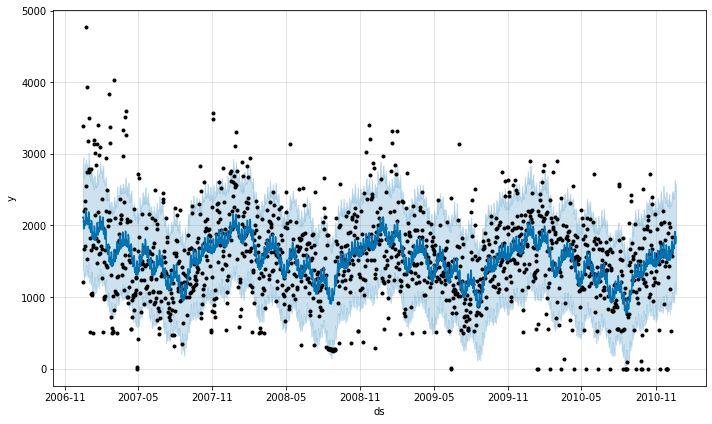

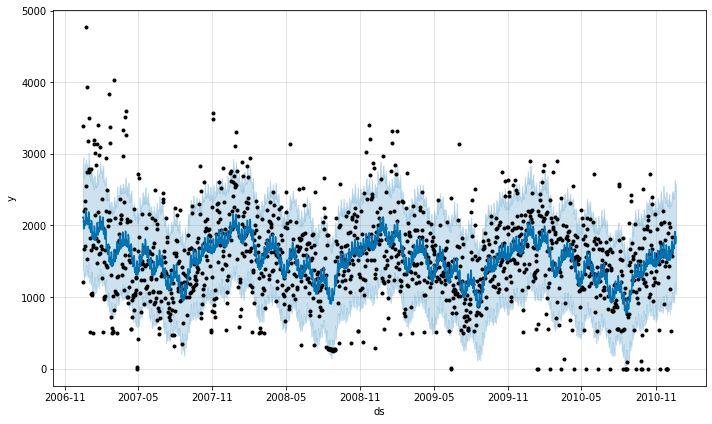

In [38]:
model.plot(forecast)

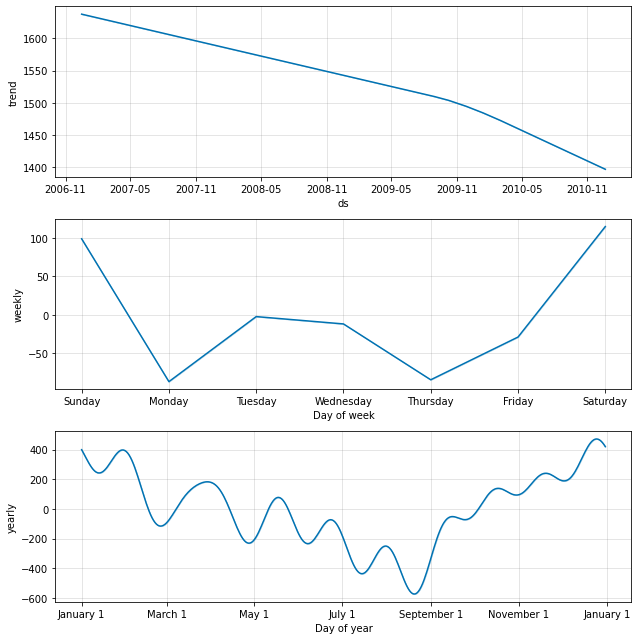

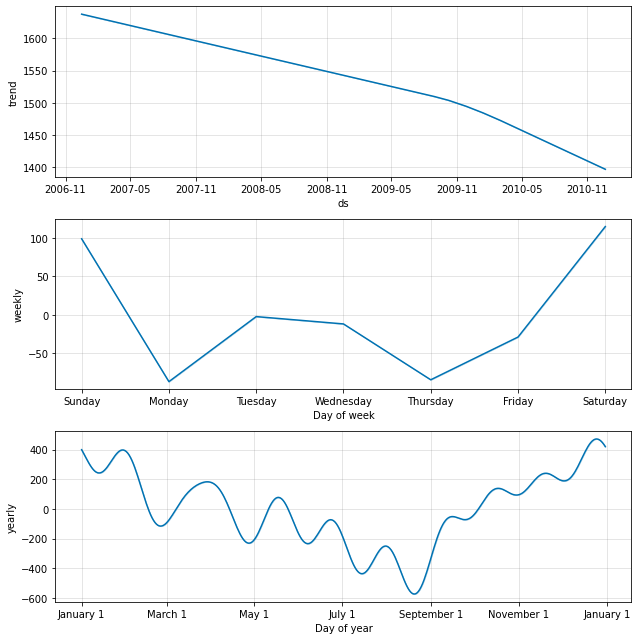

In [40]:
model.plot_components(forecast)